In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

ion = pd.read_csv('ion.csv')
ion.drop(columns={'Unnamed: 0'}, inplace=True)

In [2]:
df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

In [3]:
input_shape = [X_train.shape[1]]

In [4]:
model = keras.Sequential([
        # First layer
        layers.Dense(units=4,activation='relu',input_shape=input_shape),
        # Second layer
        layers.Dense(units=4,activation='relu'),
        # Final layer
        layers.Dense(units=1, activation='sigmoid'),
])

In [5]:
METRICS = [
      
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      
]


model.compile(
            optimizer='adam',
            loss='binary_crossentropy',
            metrics=METRICS,

)

In [6]:
early_stopping = keras.callbacks.EarlyStopping(
                        patience=10,
                        min_delta=0.001,
                        restore_best_weights=True,

)

In [7]:
history = model.fit(
                    X_train,y_train,
                    validation_data=(X_valid,y_valid),
                    verbose=0,
                    batch_size=128,
                    epochs=1000,
                    callbacks=[early_stopping],

)

history_df = pd.DataFrame(history.history)

In [8]:
history_df.head()

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall
0,0.688990,0.483740,0.431472,0.85,0.689074,0.514286,0.288136,0.653846
1,0.687592,0.500000,0.431138,0.72,0.686698,0.571429,0.288889,0.500000
2,0.685943,0.552846,0.464286,0.65,0.684256,0.695238,0.400000,0.461538
3,0.684393,0.621951,0.533333,0.56,0.681937,0.704762,0.400000,0.384615
4,0.682937,0.630081,0.548387,0.51,0.679817,0.733333,0.450000,0.346154


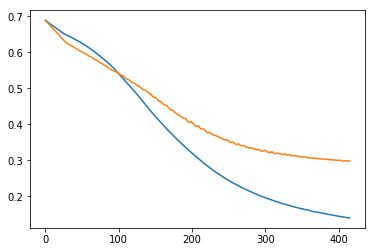

In [9]:
plt.plot(history_df.loc[0:,['loss','val_loss']]);

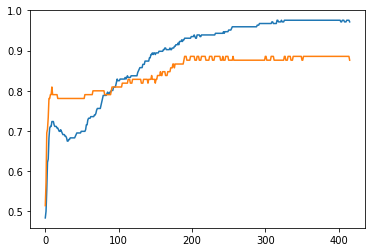

In [10]:
plt.plot(history_df.loc[0:,['accuracy','val_accuracy']]);

In [11]:
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Recall: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_recall'].max()))

Best Validation Loss: 0.2974
Best Validation Recall: 0.6538
